In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)



# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [10]:
query_date = dt.date(int(recent_date[0][:4]), int(recent_date[0][5:7]), int(recent_date[0][8:10])) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

Text(0.5, 1.0, 'Precipitation Last 12 Months')

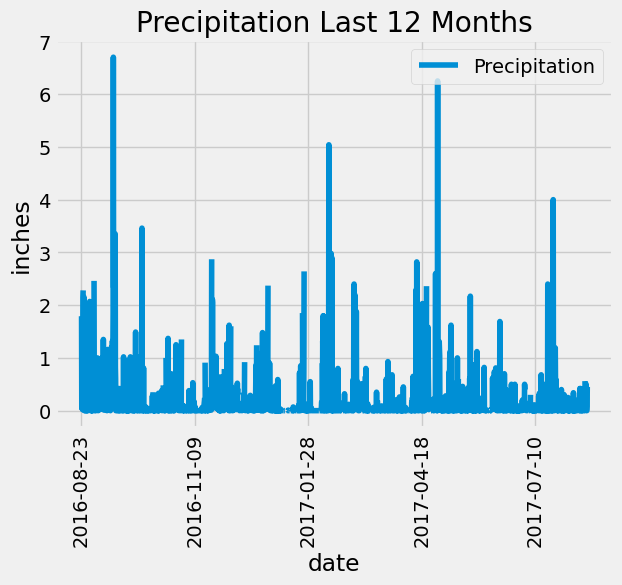

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(int(recent_date[0][:4]), int(recent_date[0][5:7]), int(recent_date[0][8:10])) - dt.timedelta(days=365)
query_date



# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(queryresult, columns=['Date','Precipitation'])


# Sort the dataframe by date
#precipitation_df = precipitation_df.dropna(how='any') # clean up non-value entries
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt

#x = precipitation_df['Date']
#y = precipitation_df['Precipitation']

precipitation_df.plot(x='Date',y='Precipitation', rot=90)
plt.xlabel("date")
plt.ylabel('inches')
# fig, ax = plt.subplots(figsize=(10,7))
# ax.bar(x, y, width=2, color='b', alpha=0.5, align="center",label='Precipitation')
# ax.xaxis_date()
# fig.autofmt_xdate()
plt.legend(loc="upper right")
plt.title("Precipitation Last 12 Months")
# plt.ylabel("Precipitation (Inches)")
# plt.tight_layout()
# plt.show()



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

# Most active station
most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")


Most active station: USC00519281


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active_station_temps = session.query(*sel).\
                            filter(Measurement.station == most_active_station).all()
print(f"Most active station temperatures: {most_active_station_temps}")


Most active station temperatures: [(54.0, 85.0, 71.66378066378067)]


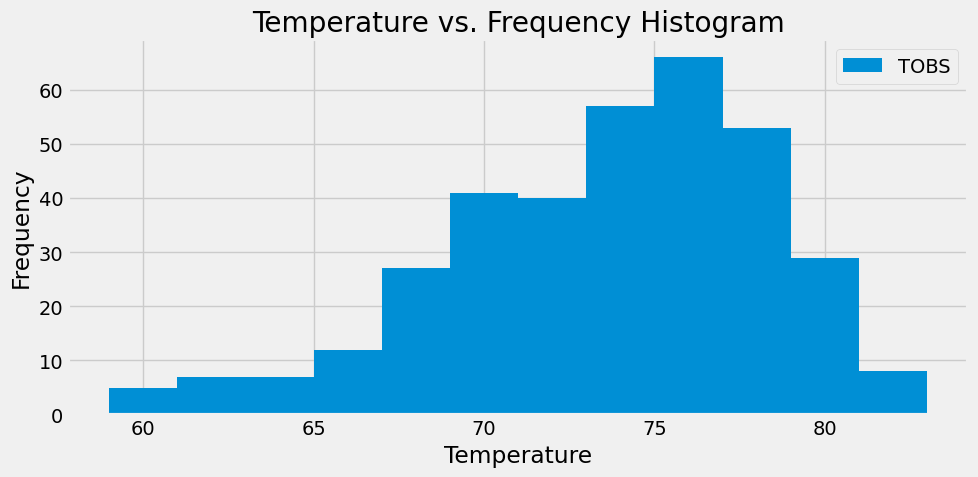

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
            filter(Measurement.date >= query_date).\
            filter(Measurement.station == most_active_station).all()
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])
tobs_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()



# Close Session

In [17]:
# Close Session
session.close()